In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

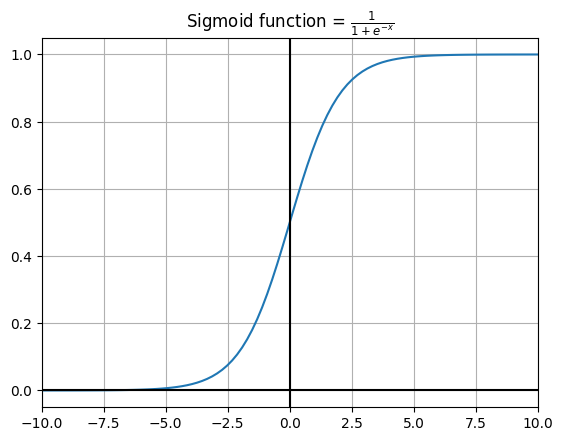

In [2]:
x = np.linspace(-10, 10, 100)
y = 1/(1+np.exp(-x))
plt.plot(x, y)
plt.axvline(0, c='k')
plt.axhline(0, c='k')
plt.title(r'Sigmoid function = $\frac{1}{1+e^{-x}}$')
plt.grid(True)
plt.xlim(-10, 10)
plt.show()

로지스틱 회귀는 선형 회귀 모델 마지막에 시그모이드 함수를 추가한 모델로 `분류`를 위한 모델이다.

In [3]:
class LogisticRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for i in range(self.n_iters):
            y_pred = self._sigmoid(self._linear(X))

            cost = - (1 / n_samples) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            if i%100 == 99:
                print(f"{i+1}th iteration | Cost: {cost:.6g}")

    def predict(self, X):
        y_prob = self._sigmoid(self._linear(X))
        y_pred = np.where(y_prob > 0.5, 1, 0)
        return y_pred

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _linear(self, X):
        return np.dot(X, self.weights) + self.bias

In [4]:
X, y = make_blobs(n_samples=100,
                  n_features=1,
                  centers=2,
                  cluster_std=5,
                  center_box=(-5, 5),
                  random_state=1111)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)

In [5]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

100th iteration | Cost: 0.508699
200th iteration | Cost: 0.46433
300th iteration | Cost: 0.447847
400th iteration | Cost: 0.440253
500th iteration | Cost: 0.43632
600th iteration | Cost: 0.434131
700th iteration | Cost: 0.432853
800th iteration | Cost: 0.432081
900th iteration | Cost: 0.431604
1000th iteration | Cost: 0.431303


In [6]:
test = np.hstack([X_test, y_test.reshape(-1, 1)])
test_true = np.where(test[:, -1] == 1)[0]
test_false = np.where(test[:, -1] == 0)[0]

test_true = test[test_true]
test_false = test[test_false]

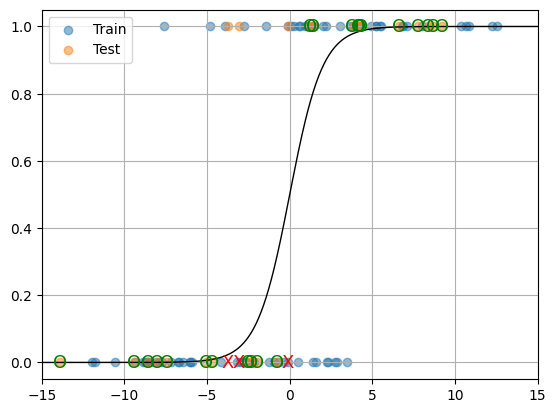

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
x = np.linspace(-20, 20, 1000)

plt.scatter(X_train, y_train, alpha=0.5, label='Train')
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
plt.plot(x, sigmoid(x), c='k', linewidth=1)

for i in range(len(X_test)):
    if y_pred[i] == y_test[i]:
        plt.text(X_test[i], y_pred[i], s='O', color='g', fontsize=13, 
                 horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(X_test[i], y_pred[i], s='X', color='r', fontsize=13,
                 horizontalalignment='center', verticalalignment='center')
plt.legend()
plt.xlim(-15, 15)
plt.grid()
plt.show()

시그모이드 함수를 통과하게 되면 0과 1 사이의 값으로 나타난다. 이때 적당한 threshold를 기준으로 (여기서는 0.5) 레이블을 0 또는 1로 분류할 수 있게 된다.

선형 회귀 모델에서는 평균 제곱 오차를 사용했었다면 로지스틱 회귀에서는 오차를 계산하기 위한 손실 함수로 크로스 엔트로피(Cross entropy)를 사용한다.

아래 그래프와 함께 보면 타겟이 1일 경우 예측값이 1에 가까울수록 손실이 줄어들고, 0에 가까울수록 손실이 급격하게 커진다. 타겟이 0일 경우에는 반대로 나타나 결국 두 클래스를 제대로 맞출 경우에 손실이 줄어들게 된다.

$$
BCELoss = -\frac{1}{N}\sum^{N}_{i=0} y_i \cdot \log(\hat{y_i}) + (1-y_i) \cdot \log(1-\hat{y_i})
$$

$y$는 클래스, $\hat{y}$는 해당 클래스일 확률이다.

[더 자세한 설명](https://wikidocs.net/22881)

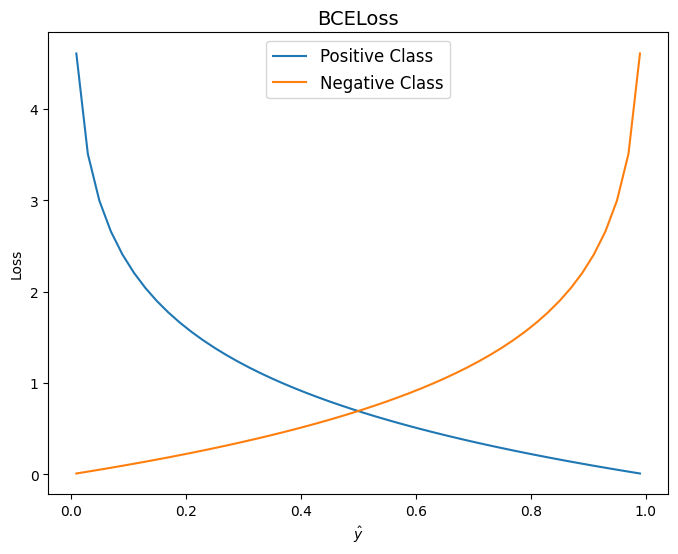

In [8]:
x = np.linspace(0.01, 0.99, 50)
plt.figure(figsize=(8, 6))
plt.plot(x, -np.log(x), label="Positive Class")
plt.plot(x, -np.log(1-x), label="Negative Class")
plt.title("BCELoss", fontsize=14)
plt.xlabel('$\hat{y}$')
plt.ylabel('Loss')
plt.legend(fontsize=12)
plt.show()

In [9]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=2,
                  cluster_std=5,
                  random_state=1111)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)

In [10]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

100th iteration | Cost: 0.352026
200th iteration | Cost: 0.289329
300th iteration | Cost: 0.2592
400th iteration | Cost: 0.240537
500th iteration | Cost: 0.227598
600th iteration | Cost: 0.218016
700th iteration | Cost: 0.210596
800th iteration | Cost: 0.204659
900th iteration | Cost: 0.199786
1000th iteration | Cost: 0.195707


In [11]:
test = np.hstack([X_test, y_test.reshape(-1, 1)])
test_true = np.where(test[:, -1] == 1)[0]
test_false = np.where(test[:, -1] == 0)[0]

test_true = test[test_true]
test_false = test[test_false]

In [12]:
X1 = np.linspace(-25, 10, 100)
X2 = np.linspace(-25, 25, 100)
X1, X2 = np.meshgrid(X1, X2)
Xs = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
Y = lgr.predict(Xs)

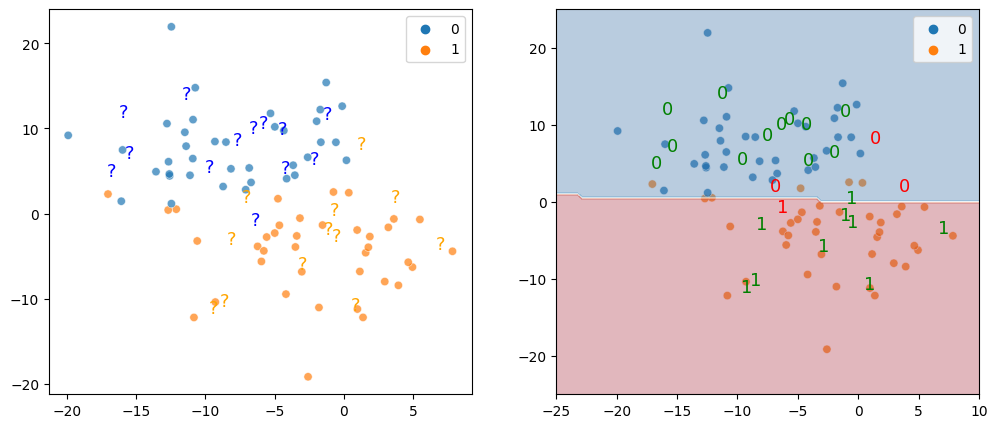

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, alpha=0.7, ax=axes[0])
for i in range(len(test_true)):
    axes[0].text(test_true[i, 0], test_true[i, 1], s='?', c='orange', fontsize=13)
for i in range(len(test_false)):
    axes[0].text(test_false[i, 0], test_false[i, 1], s='?', c='b', fontsize=13)


sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, alpha=0.7, ax=axes[1])
for i in range(len(X_test)):
    if y_pred[i] == y_test[i]:
        axes[1].text(X_test[i, 0], X_test[i, 1], s=y_pred[i], color='g', fontsize=13)
    else:
        axes[1].text(X_test[i, 0], X_test[i, 1], s=y_pred[i], color='r', fontsize=13)
axes[1].contourf(X1, X2, Y.reshape(100, 100), alpha=0.3, cmap='RdBu_r')
plt.show()

위처럼 분류가 되는데 클래스 0과 클래스 1 사이에 한 직선을 기준으로 예측하는 것을 알 수 있다.

In [14]:
acc = sum(y_test == y_pred) / len(y_test)
print(f"Accuracy: {acc*100:.2f}")

Accuracy: 84.00


다중클래스 분류를 하게 된다면 하나의 클래스와 다른 나머지 클래스 사이를 구분하는 선을 만든다고 생각하면 된다.

In [15]:
X, y = make_blobs(n_samples=300,
                  n_features=2,
                  centers=3,
                  cluster_std=1,
                  random_state=1111)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)

100th iteration | Cost: 0.00607234
200th iteration | Cost: 0.00341185
300th iteration | Cost: 0.00243259
400th iteration | Cost: 0.00191292
500th iteration | Cost: 0.00158743
600th iteration | Cost: 0.001363
700th iteration | Cost: 0.00119818
800th iteration | Cost: 0.00107161
900th iteration | Cost: 0.000971109
1000th iteration | Cost: 0.00088923
1100th iteration | Cost: 0.000821129
1200th iteration | Cost: 0.000763526
1300th iteration | Cost: 0.000714115
1400th iteration | Cost: 0.000671225
1500th iteration | Cost: 0.000633616
1600th iteration | Cost: 0.000600346
1700th iteration | Cost: 0.000570688
1800th iteration | Cost: 0.000544069
1900th iteration | Cost: 0.000520034
2000th iteration | Cost: 0.000498215
100th iteration | Cost: 0.147583
200th iteration | Cost: 0.121079
300th iteration | Cost: 0.106821
400th iteration | Cost: 0.0966421
500th iteration | Cost: 0.0885508
600th iteration | Cost: 0.0817864
700th iteration | Cost: 0.0759763
800th iteration | Cost: 0.0709044
900th itera

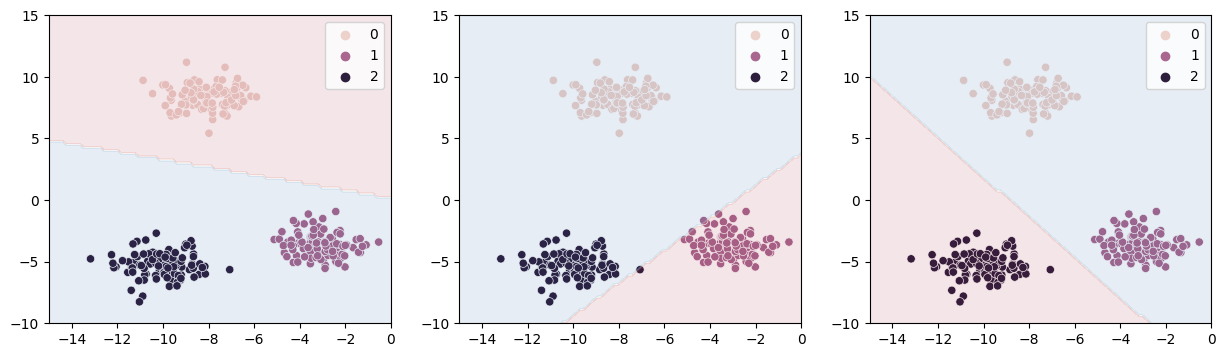

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for k, (i, j) in enumerate([[0, 1], [1, 2], [2, 0]]):
    lgr = LogisticRegression(lr=0.1, n_iters=2000)
    y_ovr = np.where(y==i, 1, 0)
    lgr.fit(X, y_ovr)

    X1 = np.linspace(-15, 0, 100)
    X2 = np.linspace(-10, 15, 100)
    X1, X2 = np.meshgrid(X1, X2)
    Xs = np.hstack([X1.reshape(-1, 1), X2.reshape(-1, 1)])
    Y = lgr.predict(Xs)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axes[k])
    axes[k].contourf(X1, X2, Y.reshape(100, 100), alpha=0.1, cmap='RdBu_r')
plt.show()

sklearn을 사용할 경우에는 아래처럼 해주면 된다. sklearn의 로지스틱 회귀를 이용할 경우에는 모델 객체를 만들 때 `multi_class`에 `ovr` 또는 `multinomial`을 넘겨줄 수 있는데. `ovr` 경우에는 위처럼 이진 분류로, `multinomial`은 전체 레이블로 오차를 계산한다(Cross Entropy). 기본값으로 다중레이블 분류를 진행하기 때문에 상관없다면 넘겨주지 않아도 된다. 위에 있는 BCE 손실을 여러 클래스로 확장한다면,

$$
CE = -\sum{y_i \cdot \log{\hat{y_i}}}
$$

$y_i$는 i 번째 클래스, $\hat{y_i}$는 $y_i$ 클래스일 확률이다.

In [17]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_preds = lgr.predict(X_test)

# 확률 반환
y_pred_probs = lgr.predict_proba(X_test)